In [43]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import random
from scipy.ndimage import generate_binary_structure
from scipy.ndimage import convolve

L = 20 #Number of sites
N = L*L
p = 1/2




#### Metropolis algorithm for the Ising model

A 2D ising model of spin $\frac{1}{2}$ is modeled that experiences a continuous phase transition:
$$
H = -J \sum_{<ij>}^{} (-s_i) s_j 
$$
which consists of N = L * L sites.





As give in the question, J > 0, and the neighbouring spins $s_i$ and $s_j$ align, energy is minimized. Magnetization per site for this case is 1.
Energy difference between the g.s and first excited state can be given as:
$$
-J \sum_{<ij>}^{} (-s_i) s_j \ - \left(- J \cdot \sum_{<ij>}^{} s_i s_j \right)\
\Delta E = 2J \cdot \sum_{<ij>}^{} s_i s_j \
$$
For T tends to infinity:
As the temperature increases to some higher amoutn, the number of positive and negative spins equals, which leads the value of magnetization to 0. However, for the highest temperature, H = -J $\sum_{<ij>}^{} (-s_i) s_j$ is also maximum.

In the first part of the program, the sites and spins were defined for L = 20 and plotted in a 2D map plot of the spin configuration.

In the next part, the paramater and initial condition were set up with initially setting up the temperature at 0.1 K. Functions for site update, system update were created. 

For part 6, the sysperm update was called for 100 times, and after each computation the internal energy and magnetization per site were plotted in order to estimate the $n_{min}$. Averaging the expectation value for n > $n_{min}$, E was calculated to be -1600 J and for magnetization it was 1 Am. 

For part 7, different temperature values were taken and the their expectation values were calculated for the samples n > $n_{min}$ taken care with the function Expectation. A 2D map was plotted with the spin configuration for the visualization.

In the last part of the program, our calculated value of magnetization was compared with the 2D ising model of the theoritical value. For the temperature up to 2 K, our value was in accordance to the theoritical values, however, for higher temperatures the calulated value didn't match the cure but still followed the trend. The error can be minimized by further decreasing the step size of the values of temperature with higher iteration values.


20


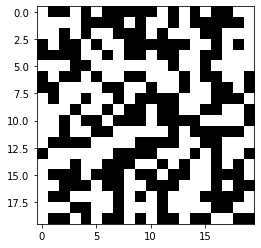

In [44]:
#Defining sites and their spins

s = np.random.choice([-1.0,1.0], size = (L,L), p = [p, 1-p])
print(len(s))
plt.imshow(s, cmap = 'gray')
plt.show()


In [45]:
#Parameter and initial condition
def nearest_neighbour(i, j):
    i_prev, i_next, j_prev, j_next = i-1, i+1, j-1, j+1
    if i == 0:
        i_prev = L-1
    if i == L-1:
        i_next = 0
    if j==0:
        j_prev = L-1
    if j== L-1:
        j_next = 0     
    nn= [s[i_prev][j], s[i_next][j], s[i][j_prev], s[i][j_next]]
    return nn
''' 
def Energy(s):
    e = 0.0
    for i in range(L):
        for j in range(L):
            nn = nearest_neighbour(i, j)
            sum_ = np.sum(nn)
            en = -1*s[i][j]*sum_
            e += en
    return e
'''
def Energy(s):
    kernel = generate_binary_structure(2, 1) 
    kernel[1][1] = False
    array = -s * convolve(s, kernel, mode='wrap')
    return array.sum()


def Magnetization(s):
    return(np.abs(np.sum(s))/N)

def Expectation(Energy,Magnetization):
    array = np.arange(0,len(Energy),1)
    for i in range(len(Energy)):
        linreg = scipy.stats.linregress(array[i:],Energy[i:])
        if(abs(linreg.slope) < 0.05):
            break
    return(np.mean(Energy[i:]),np.mean(Magnetization[i:]))


[[False  True False]
 [ True False  True]
 [False  True False]]


In [46]:
#Site Update
T = 0.1

def flip(s):
    x = random.randint(0, L-1)
    y = random.randint(0, L-1)
    E_i = Energy(s)
    s_new = s.copy()
    s_new[x,y] = s[x,y]*(-1)
    E_f = Energy(s_new)
    dE = E_f - E_i
    r = np.exp(-dE/T)
    if r>=1:
        s = s_new    
    else: 
        random_n = np.random.choice([1,0], [1,], p = [r, 1-r])
        if random_n == 1:
            s = s_new
        else:
            s = s
    return(s)
    

In [392]:
print(s)

[[ 1.  1. -1.  1. -1.]
 [-1. -1.  1. -1.  1.]
 [ 1.  1. -1.  1. -1.]
 [-1.  1. -1. -1. -1.]
 [-1. -1.  1.  1.  1.]]


In [47]:
#System Update
def systupdate(s):
    for i in range(N):
        s = flip(s)
    return(s)
for i in range(1):
    print(i)
    print('e=', Energy(s))
    
    s = systupdate(s)
    print('e after update=', Energy(s))

0
e= -40.0
e after update= -584.0


In [48]:
#Reaching convergence
n0 = 500
E = []
M = []
E.append(Energy(s))
M.append(Magnetization(s))
for i in range(n0):
    print(i)
    s = systupdate(s)
    E.append(Energy(s))
    M.append(Magnetization(s))
    

    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

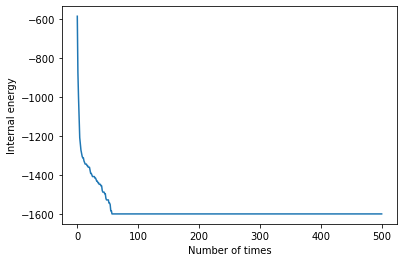

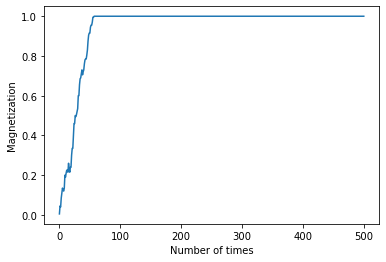

In [55]:

plt.figure()
plt.plot(E)
plt.xlabel('Number of times')
plt.ylabel('Internal energy')
plt.show()
plt.figure()
plt.plot(M)
plt.xlabel('Number of times')
plt.ylabel('Magnetization')
plt.show()

In [56]:
n_min = 90
E_avg= np.sum(E[n_min:])/len(E[n_min:])
m_avg= np.sum(M[n_min:])/len(M[n_min:])
print(E_avg, m_avg)

-1600.0 1.0


0.1
0.5
1.0
1.5
2.0
2.25
2.5
3.0
10.0
12.0


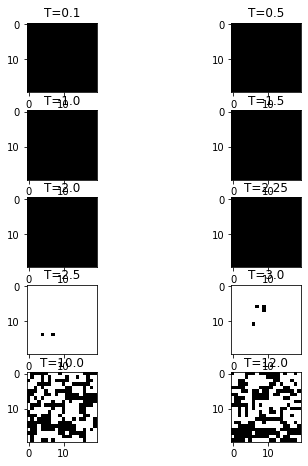

In [76]:
T_arr = [0.1, 0.5,1.0,1.5,2.0,2.25,2.5,3.0,10.0,12.0]
E, M = [], []
fig, axes = plt.subplots(5,2, figsize=(8, 8), constrained_layout=True, tight_layout=True)

axes = axes.flatten()
k = 0
for T in T_arr:
    print(T)
    E_, M_ = [], []
    for i in range(150):
        s = systupdate(s)
        E_.append(Energy(s))
        M_.append(Magnetization(s))
    ax= axes[k]
    ax.imshow(s, cmap='gray')
    ax.set_title(f'T={T}')
    k+=1
    E_avg, m_avg= Expectation(E_, M_)
    E.append(E_avg)
    M.append(m_avg)
    

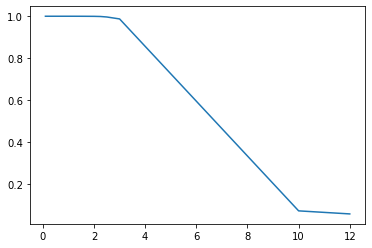

In [81]:
plt.figure(5)
plt.plot(T_arr,M)
plt.show()

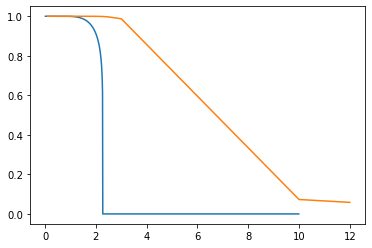

In [82]:
import math
Tc = 2/np.log(1+2**(1/2))
X = np.arange(0.01,10,0.01)
MT = np.zeros(len(X))
for i in range(len(X)):
    if(X[i] - Tc < 0):
        MT[i] = (1 - (math.sinh(2/X[i]))**(-4))**(1/8)
    else:
        MT[i] = 0
plt.figure(7)
plt.plot(X, MT)
plt.plot(T_arr, M)
plt.show()